# XGBを用いたベースモデルの構築
## データの読み込み

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
train_df = pd.read_csv(r'C:\Users\Issei\Desktop\Class Documents\KEIO 2024 Fall\Data Science\Datasets\Output\train_tokyo.csv')
test_df = pd.read_csv(r'C:\Users\Issei\Desktop\Class Documents\KEIO 2024 Fall\Data Science\Datasets\Output\test_tokyo.csv')
answer_df = pd.read_csv(r'C:\Users\Issei\Desktop\Class Documents\KEIO 2024 Fall\Data Science\Datasets\Output\answer_tokyo.csv')

In [25]:
train_df.head()

,物件ID,自社物フラグ,物件種別,空き物件数,都道府県,市区郡町村,路線1,駅1,徒歩距離1,路線2,...,駐車場料金,駐車場区分,駐車場距離,現況,引渡/入居時期,コンビニ距離,スーパー距離,取引態様,バス停有り,その他費用
0,da11daf7e9f021eef09588fcdbdcec67,0,3101,1.0,13,224,863.0,4949.0,160.0,1000.0,...,0.0,4.0,-1,-1.0,1,2,4,6,True,0.0
1,675e2a8d86de283bea808e4daf27a70f,0,3101,1.0,13,201,105.0,730.0,1200.0,105.0,...,7850.0,1.0,1,-1.0,3,4,4,6,False,28080.0
2,51c206b43e7726cd747dca15a8bd6ec2,0,3101,1.0,13,105,583.0,6381.0,320.0,577.0,...,0.0,-1.0,-1,2.0,1,-1,-1,6,False,0.0
3,dcdf3fd8ca3d0740b5a01aa339b417d1,0,3101,1.0,13,115,194.0,762.0,560.0,871.0,...,29000.0,3.0,2,2.0,1,2,3,6,False,0.0
4,12bf596823eafcfddb5a015761bde50b,0,3101,1.0,13,113,863.0,4925.0,400.0,863.0,...,0.0,4.0,-1,2.0,1,-1,-1,6,False,41200.0


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104000 entries, 0 to 103999
Data columns (total 36 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   物件ID       104000 non-null  object 
 1   自社物フラグ     104000 non-null  int64  
 2   物件種別       104000 non-null  int64  
 3   空き物件数      104000 non-null  float64
 4   都道府県       104000 non-null  int64  
 5   市区郡町村      104000 non-null  int64  
 6   路線1        104000 non-null  float64
 7   駅1         104000 non-null  float64
 8   徒歩距離1      104000 non-null  float64
 9   路線2        104000 non-null  float64
 10  駅2         104000 non-null  float64
 11  徒歩距離2      104000 non-null  float64
 12  建物構造       104000 non-null  float64
 13  建物面積/専有面積  104000 non-null  float64
 14  建物階数(地上)   104000 non-null  float64
 15  築年月        104000 non-null  float64
 16  新築・未入居フラグ  104000 non-null  int64  
 17  部屋階数       104000 non-null  float64
 18  向き         104000 non-null  float64
 19  間取部屋数      104000 non-n

In [27]:
answer_df.head()

,賃料/価格
0,43000
1,70000
2,78000
3,69600
4,67000


In [28]:
train_df.drop('物件ID', axis=1, inplace=True)
test_df.drop('物件ID', axis=1, inplace=True)
train_df.drop('敷金', axis=1, inplace=True)
train_df.drop('礼金', axis=1, inplace=True)
test_df.drop('敷金', axis=1, inplace=True)
test_df.drop('礼金', axis=1, inplace=True)

# Train Model

In [29]:
# import xgb and other libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = train_df.drop('賃料/価格', axis=1)
y = train_df['賃料/価格']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1)
xg_reg.fit(X_train, y_train)
preds = xg_reg.predict(X_test)
score = np.sqrt(mean_squared_error(y_test, preds))
print(score)


59853.7176063889


{'col_sample_bytree': 0.3,
 'lambda': 0.7,
 'learning_rate': 0.01,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 600,
 'seed': 123}

In [30]:
params = {'col_sample_bytree': 0.3,
 'lambda': 0.7,
 'learning_rate': 0.01,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 600,
 'seed': 123
 }
xg_reg_grid = xgb.XGBRegressor(objective ='reg:squarederror', params=params)
xg_reg_grid.fit(X_train, y_train)
preds = xg_reg_grid.predict(X_test)
score = np.sqrt(mean_squared_error(y_test, preds))
print(score)

C:\Users\Issei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\core.py:158: UserWarning: [17:08:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "params" } are not used.

  warnings.warn(smsg, UserWarning)


60611.804539974066


In [31]:
# hyperparameter tuning with optuna
import optuna
from xgboost import XGBRegressor

def objective(trial):
    params = {
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.9),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'n_estimators': trial.suggest_int('n_estimators', 100, 600),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.1, 1),
        'random_state': 123
    }
    
    model = XGBRegressor(**params)
    model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=False)
    preds = model.predict(X_test)
    score = np.sqrt(mean_squared_error(y_test, preds))
    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=5, n_jobs=10)

print(study.best_params, study.best_value)

C:\Users\Issei\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-01-08 17:08:38,639] A new study created in memory with name: no-name-ed067add-c380-478b-9b6e-efb12d54d735
[I 2025-01-08 17:08:42,011] Trial 1 finished with value: 76222.32936928926 and parameters: {'colsample_bytree': 0.5438335524500193, 'reg_lambda': 0.3273254869827409, 'learning_rate': 0.3915463963651035, 'max_depth': 6, 'min_child_weight': 4, 'n_estimators': 251, 'reg_alpha': 0.45599871387747415}. Best is trial 1 with value: 76222.32936928926.
[I 2025-01-08 17:08:42,321] Trial 0 finished with value: 68639.9176831697 and parameters: {'colsample_bytree': 0.9849411564329708, 'reg_lambda': 0.669549708403439, 'learning_rate': 0.22287008413544

{'colsample_bytree': 0.3967696978050841, 'reg_lambda': 0.15335990527568477, 'learning_rate': 0.132735417215581, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 535, 'reg_alpha': 0.7105848381884641} 60367.55115298111


In [32]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.41, 0.43),
        'lambda': trial.suggest_float('lambda', 0.65, 0.69),
        'learning_rate': trial.suggest_float('learning_rate', 0.018, 0.02),
        'max_depth': 13,
        'min_child_weight': 1,
        'alpha': trial.suggest_float('alpha', 0.5, 0.55),
        'gamma': trial.suggest_float('gamma', 0.65, 0.68),
        'subsample': trial.suggest_float('subsample', 0.99, 1),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.45, 0.48),
        'seed': 123
    }
    
    # Convert the data to DMatrix
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Train the model with `num_boost_round`
    bst = xgb.train(
        params=params,
        dtrain=dtrain,
        num_boost_round=trial.suggest_int('num_boost_round', 380, 390),
        evals=[(dtest, 'validation')],
        early_stopping_rounds=5,
        verbose_eval=False
    )
    
    # Predict and calculate RMSE
    preds = bst.predict(dtest)
    score = np.sqrt(mean_squared_error(y_test, preds))
    return score

# Create and optimize the study
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1, n_jobs=-1)

print(study.best_params, study.best_value)


[I 2025-01-08 17:08:45,289] A new study created in memory with name: no-name-0d3e7ee7-5ac5-4c5b-b524-e93d1e25c274
[I 2025-01-08 17:08:50,988] Trial 0 finished with value: 55200.15726691053 and parameters: {'colsample_bytree': 0.42700306963533297, 'lambda': 0.6571704307387779, 'learning_rate': 0.019850664102391596, 'alpha': 0.5364387364880336, 'gamma': 0.6768988634472995, 'subsample': 0.9901853355703061, 'colsample_bylevel': 0.4741490421411839, 'num_boost_round': 383}. Best is trial 0 with value: 55200.15726691053.


{'colsample_bytree': 0.42700306963533297, 'lambda': 0.6571704307387779, 'learning_rate': 0.019850664102391596, 'alpha': 0.5364387364880336, 'gamma': 0.6768988634472995, 'subsample': 0.9901853355703061, 'colsample_bylevel': 0.4741490421411839, 'num_boost_round': 383} 55200.15726691053


{'colsample_bytree': 0.7990941136600122, 'lambda': 0.6058853201731084, 'learning_rate': 0.011750169483301667, 'max_depth': 9, 'min_child_weight': 1, 'alpha': 0.40586215082837906, 'num_boost_round': 285} 53364.69906499748

{'colsample_bytree': 0.42034609055475514, 'lambda': 0.6762895065509983, 'learning_rate': 0.018867542811951306, 'max_depth': 13, 'min_child_weight': 1, 'alpha': 0.5336472588050329, 'gamma': 0.6510749282340125, 'subsample': 0.9995715079391045, 'colsample_bylevel': 0.46391297205852455, 'num_boost_round': 383} #best_params

{'colsample_bytree': 0.4282410945768199, 'lambda': 0.6629589490890622, 'learning_rate': 0.01843808599641744, 'alpha': 0.50593521723238, 'gamma': 0.6677873692997006, 'subsample': 0.9997920084796162, 'colsample_bylevel': 0.45032264404222816, 'num_boost_round': 387} 51948.884150592974

In [33]:
best_params_1 = {'colsample_bytree': 0.42034609055475514, 'lambda': 0.6762895065509983, 'learning_rate': 0.018867542811951306, 'max_depth': 13, 'min_child_weight': 1, 'alpha': 0.5336472588050329, 'gamma': 0.6510749282340125, 'subsample': 0.9995715079391045, 'colsample_bylevel': 0.46391297205852455, 'num_boost_round': 383}

In [34]:
# Calculate the actual score (best_params_1)
X_leaderboard = test_df
y_leaderboard = answer_df['賃料/価格']

best_params = study.best_params
bst_num_boost_round = best_params_1.pop('num_boost_round')
dleaderboard = xgb.DMatrix(X_leaderboard, label=y_leaderboard)
bst = xgb.train(params=best_params_1, dtrain=dleaderboard, num_boost_round=bst_num_boost_round) #243
preds = bst.predict(dleaderboard)
score = np.sqrt(mean_squared_error(y_leaderboard, preds))
print('RMSE: ', score)
print(best_params_1)

RMSE:  4235.145379468177
{'colsample_bytree': 0.42034609055475514, 'lambda': 0.6762895065509983, 'learning_rate': 0.018867542811951306, 'max_depth': 13, 'min_child_weight': 1, 'alpha': 0.5336472588050329, 'gamma': 0.6510749282340125, 'subsample': 0.9995715079391045, 'colsample_bylevel': 0.46391297205852455}


In [35]:
best_params = study.best_params
bst_num_boost_round = best_params.pop('num_boost_round')
dleaderboard = xgb.DMatrix(X_leaderboard, label=y_leaderboard)
bst = xgb.train(params=best_params, dtrain=dleaderboard, num_boost_round=bst_num_boost_round)
preds = bst.predict(dleaderboard)
score = np.sqrt(mean_squared_error(y_leaderboard, preds))
print('RMSE: ', score)
print(best_params)

RMSE:  18923.063780733493
{'colsample_bytree': 0.42700306963533297, 'lambda': 0.6571704307387779, 'learning_rate': 0.019850664102391596, 'alpha': 0.5364387364880336, 'gamma': 0.6768988634472995, 'subsample': 0.9901853355703061, 'colsample_bylevel': 0.4741490421411839}


<Axes: >

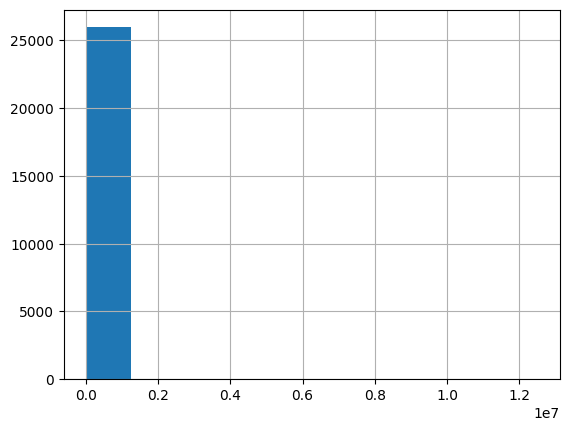

In [36]:
# calculate average of target variable
answer_df['賃料/価格'].hist()

<Axes: >

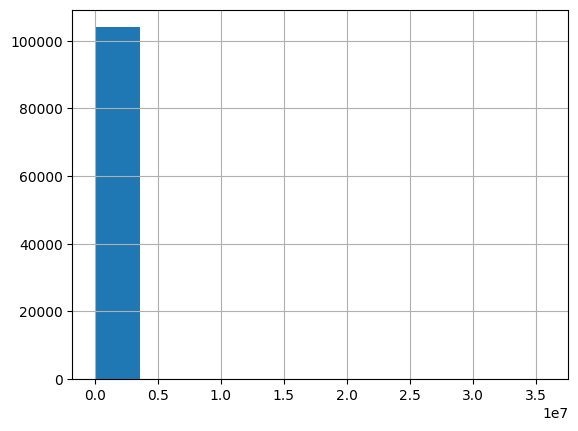

In [37]:
train_df['賃料/価格'].hist()